# Plotting with Python: a matplotlib tutorial
---

## Why use matplotlib?

* It's free!
* It's open source.
* Basic syntax is similar to matlab.
* **Everything** is customisable -- *every* component of a matplotlib plot is an object that you can manipulate.
* Python is a much more general, versatile scripting language than matlab. Great for gluing projects together.

---
## Basic usage (matlab style)


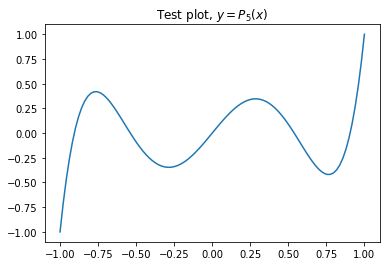

In [206]:
#This command only needed if using Jupyter
%matplotlib inline

#Import the plotting module and numpy 
import matplotlib.pyplot as plt
import numpy as np

#For example, compute 5th Legendre polynomial
from scipy.special import legendre
f = legendre(5)
g = legendre(8)
x = np.linspace(-1,1,100)
y = f(x)
y2 = g(x) 

# #To read in some data
# dat = np.genfromtxt("fname.csv", delimiter=",")
# x, y = np.hsplit(dat, 2) 

#Now plot it
plt.plot(x,y)
# plt.plot(x,y2)
plt.title("Test plot, $y=P_{5}(x)$")
plt.show()


 * Simple customisation can be done by specifying ```linestyle```, ```linewidth```, ```color``` and ```markerstyle```. These can also be abbreviated.

* Default available colours are ```b``` (blue), ```k``` (black), ```r``` (red), ```g``` (green), ```c``` (cyan), ```m``` (magenta), ```y``` (yellow) and ```w``` (white).

* To save a figure, use ```plt.savefig(filename, fmt='format')```, where ```format``` could be ```png```, ```jpg```, ```svg```, ```pdf``` and more ... 

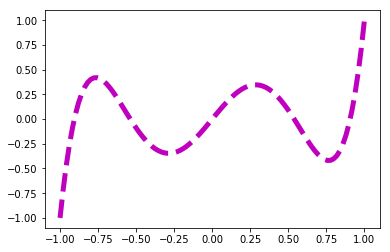

In [207]:
plt.plot(x, y, linestyle='--', color='m', linewidth=5)
plt.show()

---
## Better practices -- object orientation

 * It's best to use matplotlib in a more object orientated way.
 * Below is a quick example of a class if you're not familiar with OOP.

 



In [208]:
#Begin the class definition
class Wallet: 
    
    #Some variables that belong to this class
    CreditCard = 0.0
    Cash = 0.0 
    
    #The constructor function 
    def __init__(self):
        return None
    
    #Below are two functions that belong to this class
    def AddCash(self, x):
        self.Cash += x 
        
    def PrintStatement(self):
        print "I have £%g" %self.Cash
        

#We can now declare an instance of the class we defined above
mywallet = Wallet()

#And now access its member functions using the dot notation
mywallet.AddCash(10.0) 
mywallet.PrintStatement()

I have £10


 * In **Matplotlib** a plot is a collection of objects that can be passed around, with properties that can be manipulated. 
 * The most important class is ```figure```:

In [209]:
fig = plt.figure() 

* The ```figure``` class is the canvas.
* The next most important class is the ```Axes``` class, this contains most of what we need.
* A convenient way to instantiate an ```Axes``` object is using the ```add_subplot``` function, which belongs to the ```figure``` class:


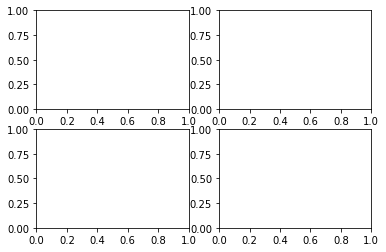

In [210]:
#Declare a figure object 
fig = plt.figure() 

#Now create an axis object for each subplot
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
plt.show()

* The ```add_sublot``` functions take a tuple ```(nrows, ncols, axisID)```.
* If you the number of rows is in the single digits, then you can even leave out the commas:

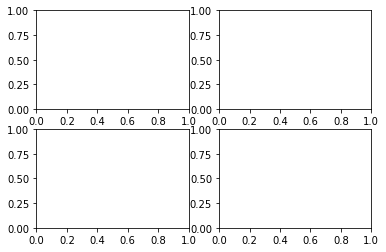

In [211]:
fig = plt.figure() 
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
plt.show()

* Any of the ```Axes``` objects can be manipulated and plotted to. 
* See [here](https://matplotlib.org/api/axes_api.html#axis-limits) for a full list of methods and variables available for the ```Axes``` object.
* For example:

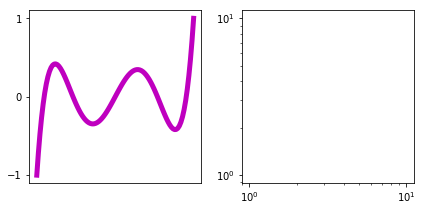

In [212]:
#Again, create a figure
fig = plt.figure()

#Now add two plots side by side within the figure 
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122) 

#Now plot to the left plot
ax0.plot(x, y, 'm-', lw='5.0') 

#Adjust the ticks of the left plot
ax0.set_xticks([])
ax0.set_yticks([-1,0,1])
ax0.set_aspect('equal')

#Make the right hand plot logarithmic
ax1.set_xscale("log", nonposx='clip')
ax1.set_yscale("log", nonposx='clip')
ax1.set_aspect('equal')

plt.tight_layout()
plt.show()

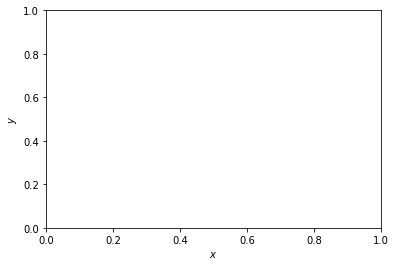

In [213]:
#For a single plot
fig = plt.figure() 
ax0 = fig.add_subplot(111)

#Labels can be set like this
ax0.set_xlabel("$x$")
ax0.set_ylabel("$y$")
plt.show()

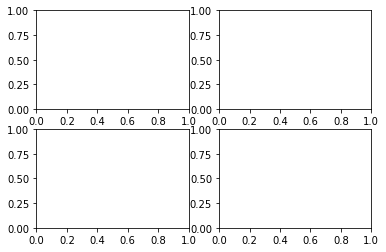

In [214]:
#Another, more compact notation you might see
fig, axvec = plt.subplots(2, 2)
plt.show()


* You can also set options when you create the figures and axes:

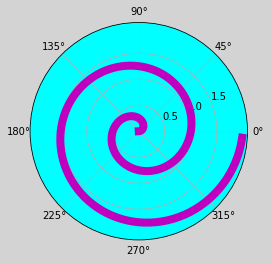

In [215]:
#Make the canvas grey
fig = plt.figure(facecolor='#D3D3D3')

#Make the plot polar and change its colour
ax0 = fig.add_subplot(111, projection='polar', facecolor='cyan')

#Plot something to it
r = np.arange(0, 2, 0.01)
theta = 2.0*np.pi*r
ax0.plot(theta, r, 'm-', lw=8.0)

#Now set its ticks
ax0.set_yticks([0.5, 1, 1.5])
plt.show()

* Python allows you to create objects called dictionaries.
* These are convenient for setting global parameters.
* For example:

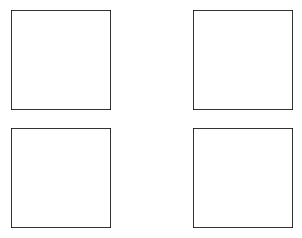

In [216]:
#Say I want to turn of ticks and set aspect ratio for all plots in my figure
#Create a dictionary
mydict = {'xticks':([]), 'yticks':([]), 'aspect':'equal'}

#Now create a figure and pass it this dictionary
fig, axvec = plt.subplots(2, 2, subplot_kw=dict(mydict))
plt.show()

* Another good use is to set the fontsizes globally.
* The following settings should match a LaTeX document nicely.


In [217]:
import matplotlib

#Set up plot style
font = {'size'   : 14}
matplotlib.rc('font', **font)
matplotlib.rc('font', serif='Computer Modern Roman')

* Now that we've set these global parameters, lets see how our plots look.

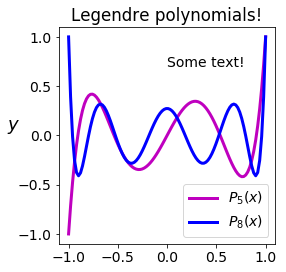

In [218]:
fig = plt.figure()
ax0 = fig.add_subplot(111)

#Now plot, including legend
ax0.plot(x, y, 'm-', lw=3.0, label='$P_{5}(x)$') 
ax0.plot(x, y2, 'b-', lw=3.0, label='$P_{8}(x)$')
ax0.set_aspect('equal')

#Add some text
ax0.text(0,0.7, 'Some text!')

#Add the legend
ax0.legend(loc=4)

#Add title
ax0.set_title("Legendre polynomials!")

#Set axis labels
ax0.set_ylabel("$y$", rotation=0, fontsize=18)

plt.tight_layout()
plt.show()

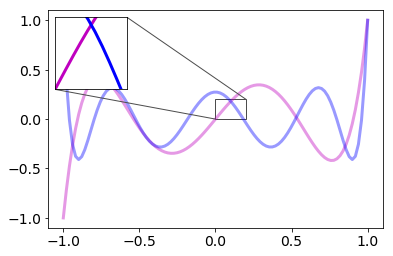

In [243]:
#Here's how to do an inset plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig = plt.figure()
ax0 = fig.add_subplot(111)

# Create an inset axis object
axins = inset_axes(ax0, width=1, height=1, loc=2)

#Plot the same thing to both ax0 and axins
axins.plot(x, y, 'm-', lw=3.0) 
axins.plot(x, y2, 'b-', lw=3.0)
ax0.plot(x, y, 'm-', lw=3.0, alpha=0.4) 
ax0.plot(x, y2, 'b-', lw=3.0, alpha=0.4)

# Set inset options
xx1, xx2, yy1, yy2 = 0.0, 0.2, 0.0, 0.2
axins.set_xlim(xx1, xx2)
axins.set_ylim(yy1, yy2)
axins.set_xticks([])
axins.set_yticks([])

# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax0, axins, loc1=1, loc2=3, fc="k", ec="0.3")

# plt.tight_layout()
plt.show()


* Now to create a 2D plot:

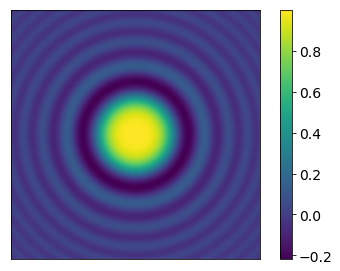

In [278]:
from matplotlib import cm, colors

#Again, create a figure
fig = plt.figure()
ax0 = fig.add_subplot(111)

#Create a mesh grid
xprime = np.linspace(-5, 5, 1000)
yprime = np.linspace(-5, 5, 1000)
X,Y = np.meshgrid(xprime, yprime)

#Create a surface to plot
surf1 = np.sin(X**2 + Y**2)/(X**2 + Y**2)

#Normalise the colormap
norm=colors.Normalize(vmin = np.min(surf1), 
    vmax = np.max(surf1), clip = False)

ax0.imshow(surf1, norm=norm)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_aspect('equal')

#Colorbar
m = cm.ScalarMappable(cmap='viridis', norm=norm)
m.set_array(surf1)  

plt.colorbar(m)
plt.tight_layout()
plt.show()

## Quick 3D example

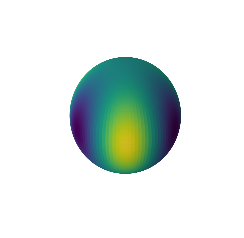

In [285]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

# Calculate the spherical harmonic 
fcolors = sph_harm(3, 3, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.viridis(fcolors))

# Turn off the axis planes
ax.set_axis_off()
plt.show()